In [1]:
#libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#testing and traning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
import xgboost as xgb
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score,mean_absolute_error
from sklearn import metrics

# Path to your Excel file
file_path = r'C:\Users\itzsa\OneDrive\Desktop\Project\Movie dataset.xlsx'

# Read the Excel file
data = pd.read_excel(file_path)
data.columns = data.columns.str.strip()
data = data.drop(columns=['Name',])
data.dropna(subset=['Rating','Duration','Genre','Director'], inplace=True)

data.info()






<class 'pandas.core.frame.DataFrame'>
Index: 5819 entries, 0 to 15501
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      5819 non-null   float64
 1   Duration  5819 non-null   object 
 2   Genre     5819 non-null   object 
 3   Rating    5819 non-null   float64
 4   Votes     5819 non-null   object 
 5   Director  5819 non-null   object 
 6   Actor 1   5819 non-null   object 
 7   Actor 2   5819 non-null   object 
 8   Actor 3   5819 non-null   object 
dtypes: float64(2), object(7)
memory usage: 454.6+ KB


In [2]:
data.isnull().sum()

Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [3]:
data['Genre'].value_counts

<bound method IndexOpsMixin.value_counts of 0                            Drama
2                  Comedy, Romance
4           Comedy, Drama, Musical
5              Drama, Romance, War
7        Horror, Mystery, Thriller
                   ...            
15486                        Drama
15487    Biography, Drama, History
15496         Action, Crime, Drama
15498                Action, Drama
15501                Action, Drama
Name: Genre, Length: 5819, dtype: object>

In [4]:
data.dtypes

Year        float64
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5819 entries, 0 to 15501
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      5819 non-null   float64
 1   Duration  5819 non-null   object 
 2   Genre     5819 non-null   object 
 3   Rating    5819 non-null   float64
 4   Votes     5819 non-null   object 
 5   Director  5819 non-null   object 
 6   Actor 1   5819 non-null   object 
 7   Actor 2   5819 non-null   object 
 8   Actor 3   5819 non-null   object 
dtypes: float64(2), object(7)
memory usage: 454.6+ KB


In [6]:
cat_col=['Duration','Genre','Year','Director','Votes','Actor 1','Actor 2','Actor 3']
le=LabelEncoder()
for i in cat_col:
    data[i]=le.fit_transform(data[i])
data.dtypes   

Year          int64
Duration      int64
Genre         int64
Rating      float64
Votes         int64
Director      int64
Actor 1       int64
Actor 2       int64
Actor 3       int64
dtype: object

In [7]:
skewed_features = ['Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1',
       'Actor 2', 'Actor 3']

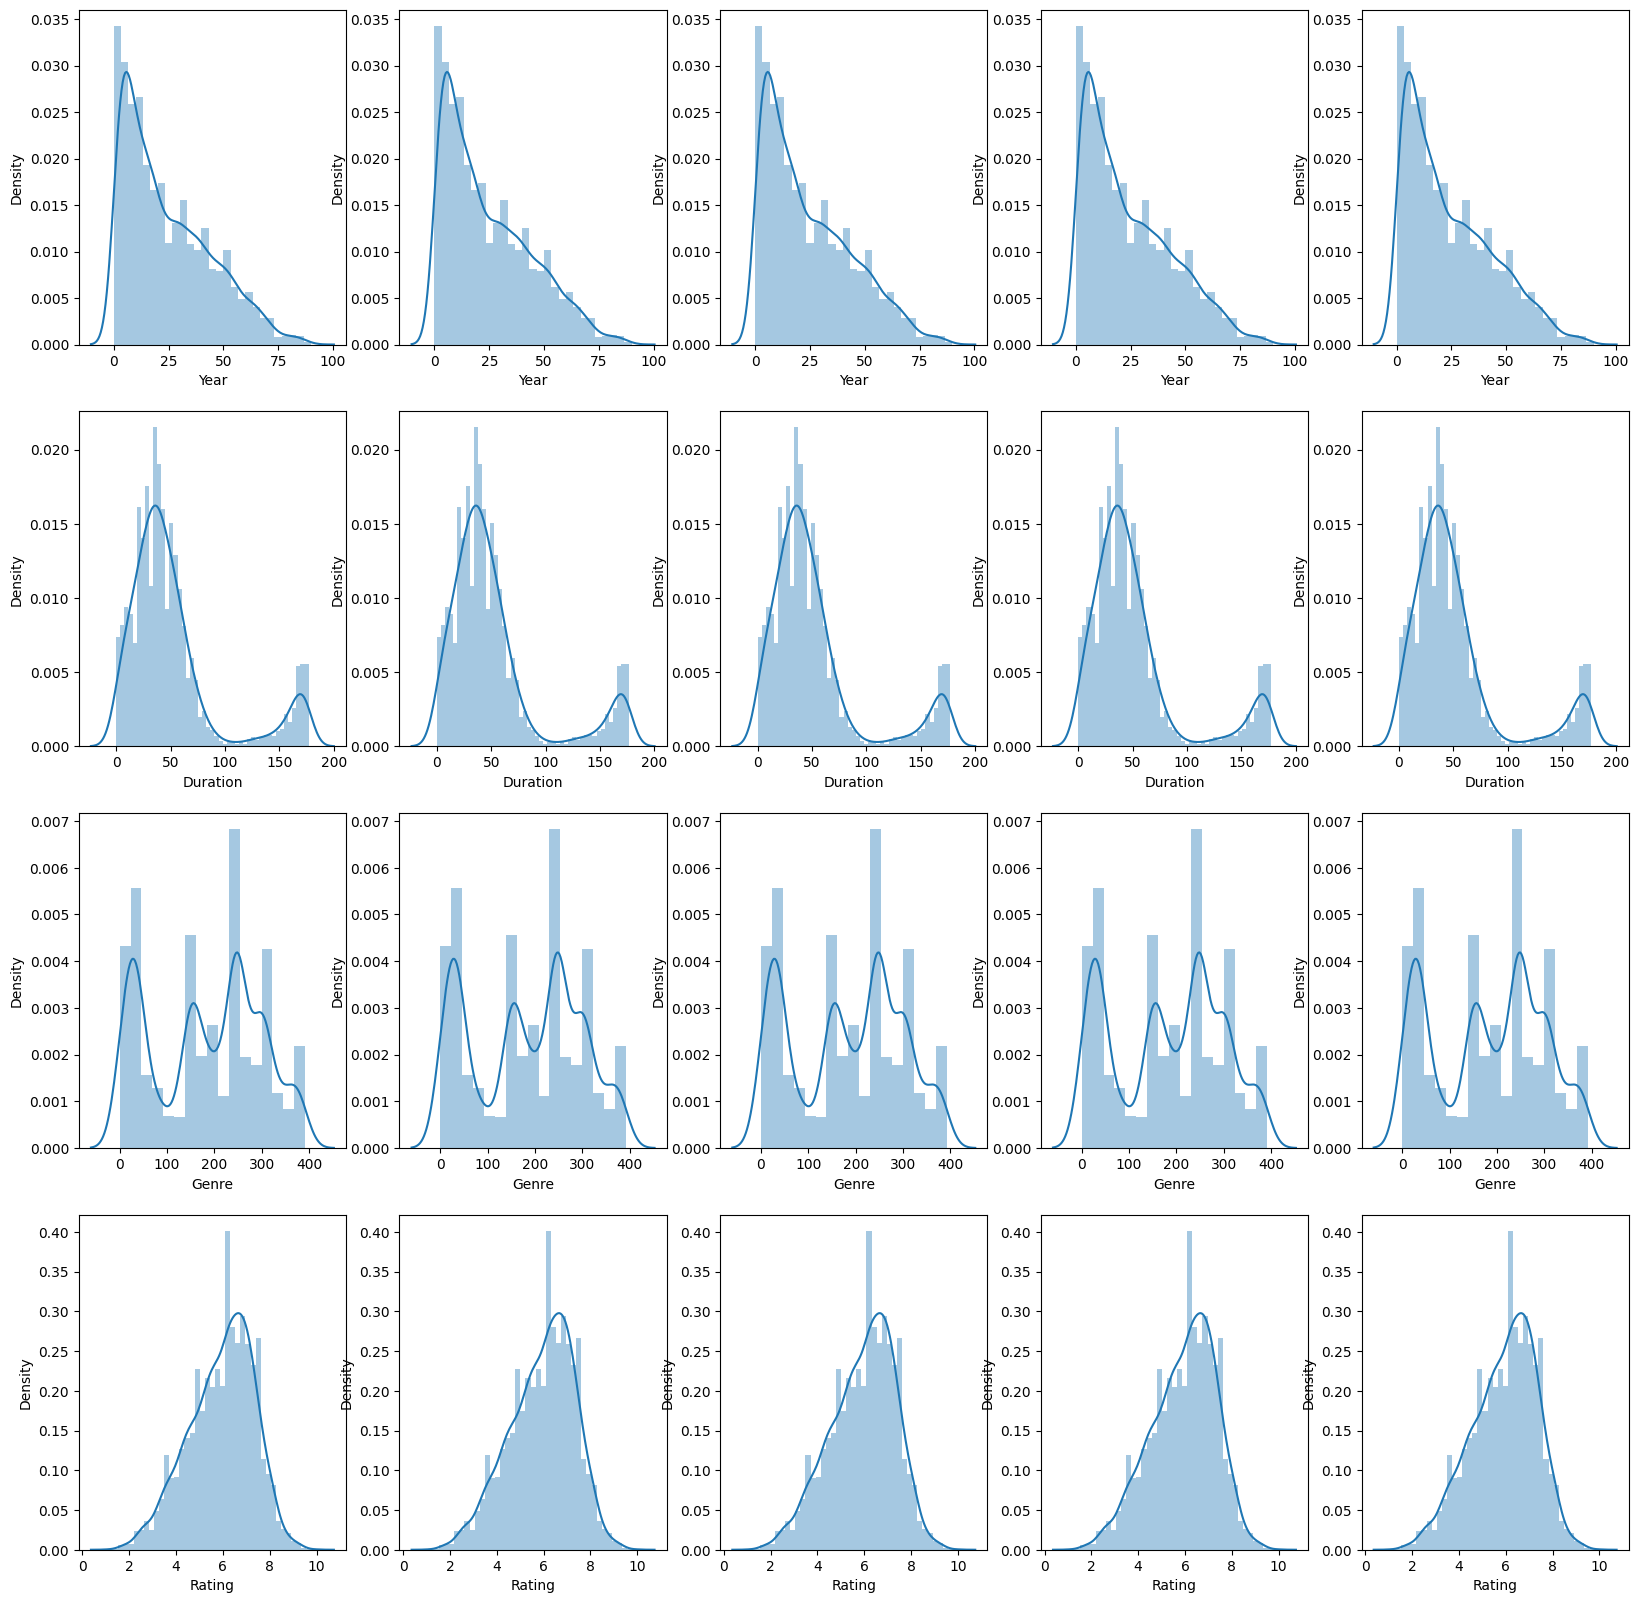

In [8]:
rows=4
cols=5
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,20))
col=data.columns
index=0
for i in range(rows):
    for j in range(cols):
     sns.distplot(data[col[index]],ax=ax[i][j])
    index=index+1

In [9]:
data.columns


Index(['Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1',
       'Actor 2', 'Actor 3'],
      dtype='object')

In [10]:
for i in skewed_features:
    data[i]=np.log(data[i]+1)

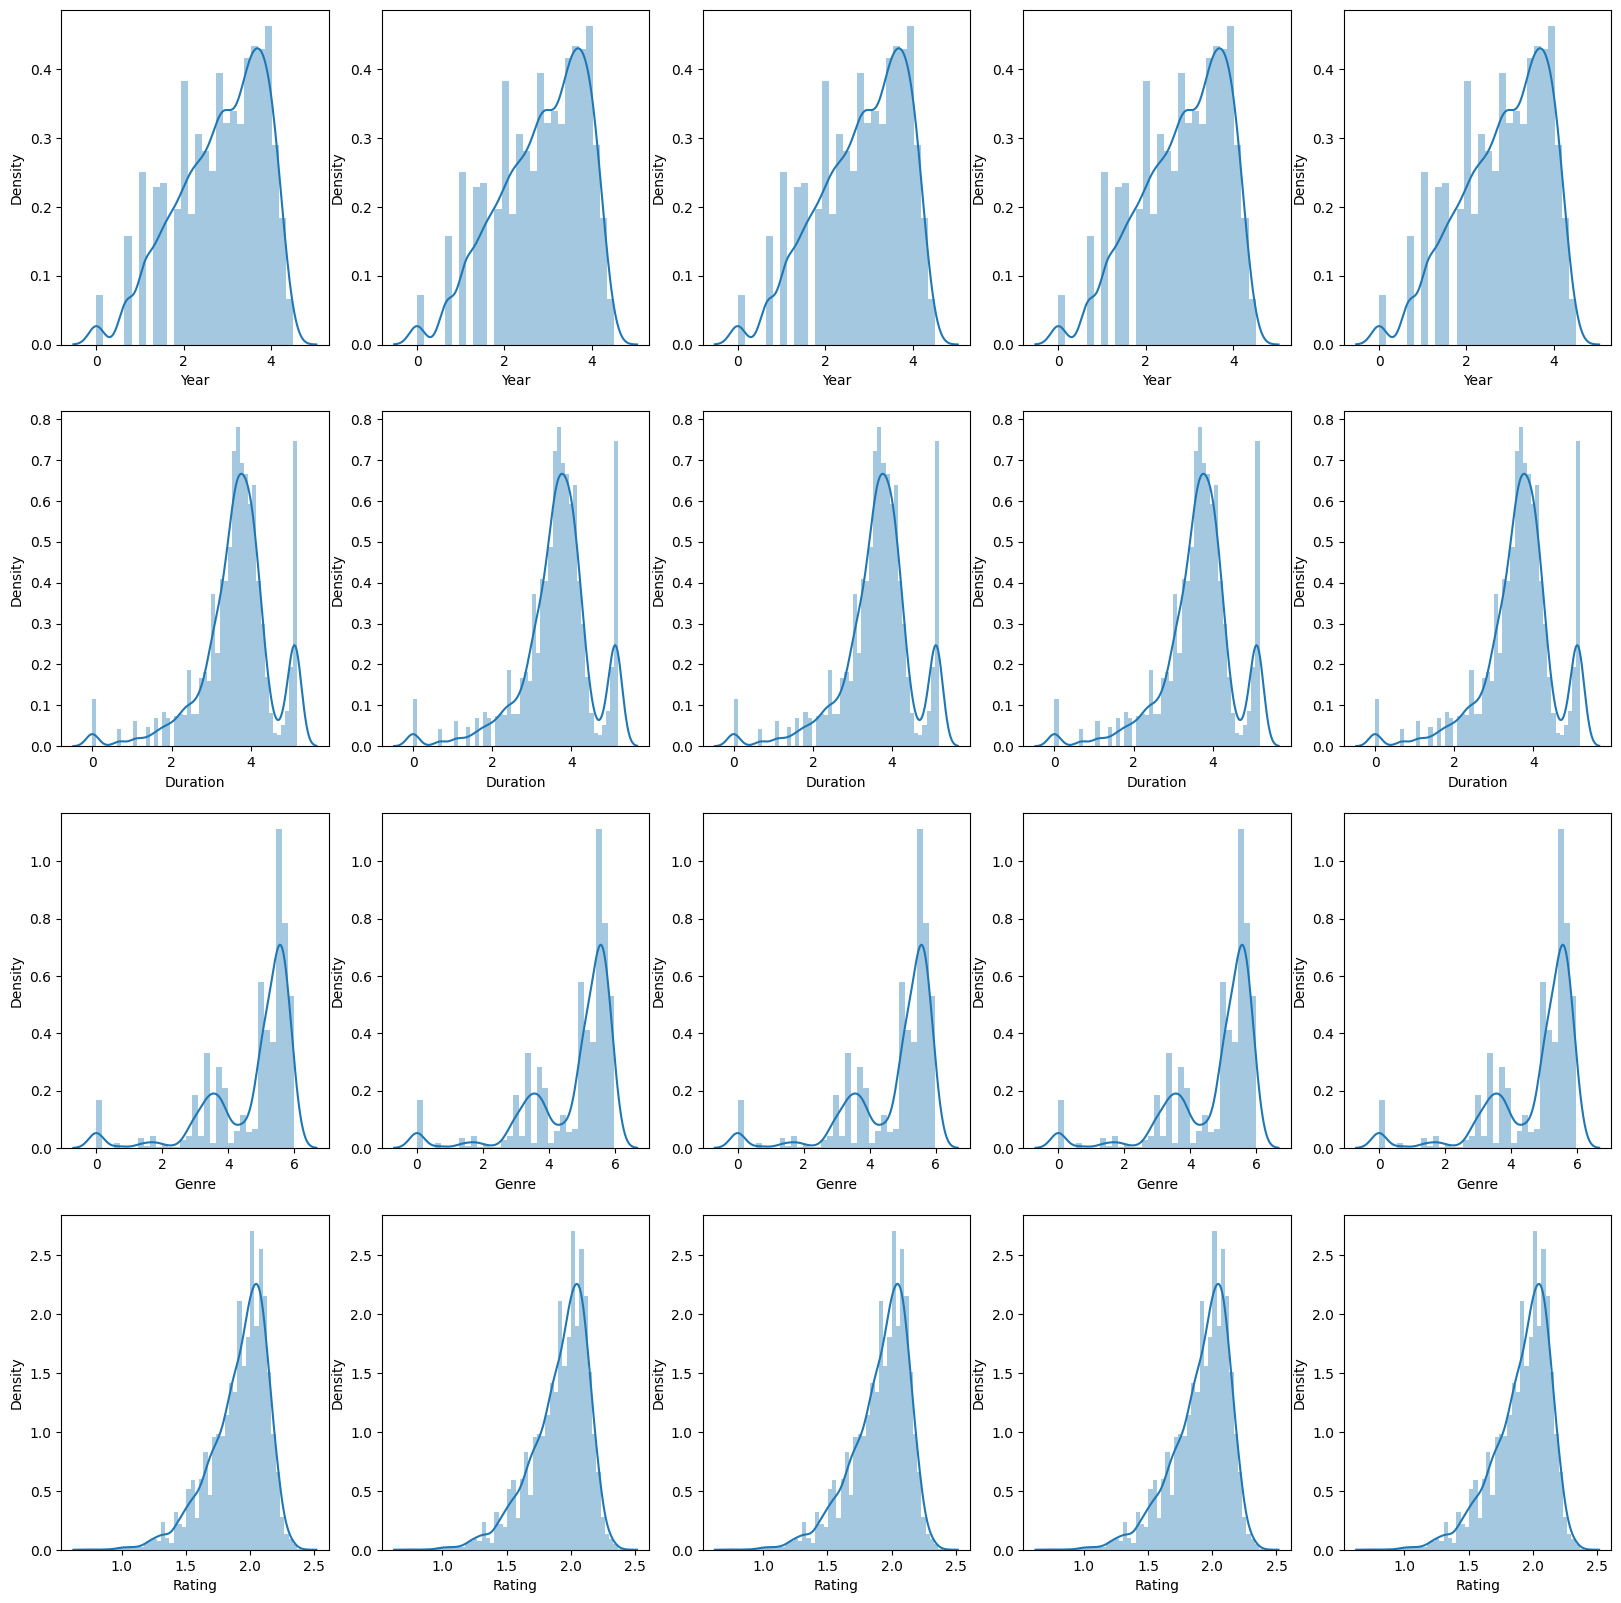

In [11]:
rows=4
cols=5
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,20))
col=data.columns
index=0
for i in range(rows):
    for j in range(cols):
     sns.distplot(data[col[index]],ax=ax[i][j])
    index=index+1


In [12]:
X = data.drop(columns=['Rating'])
Y = data['Rating']

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=40)
print (X_train.shape,X_test.shape,Y_train.shape,Y_test.shape) 

(4073, 8) (1746, 8) (4073,) (1746,)


In [21]:
lr=LinearRegression()
lr = lr.fit(X_train,Y_train)
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(Y_test,test_pred))
rmse_train = np.sqrt(mean_squared_error(Y_train,train_pred))
print("rmse train =",str(rmse_train))
print("rmse test =",str(rmse_test))
print("-"*50)
print("rsquared value on train =",lr.score(X_train,Y_train))
print("rsquared value on test =",lr.score(X_test,Y_test))

rmse train = 0.217578876103332
rmse test = 0.21189886068080147
--------------------------------------------------
rsquared value on train = 0.0517417086805938
rsquared value on test = 0.05332217728631139


In [16]:
errors = abs(test_pred -Y_test) 
mape = 100*(errors/Y_test)
accuracy = 100 - np.mean(mape)
print('accuracy:',round(accuracy,2),'%')

accuracy: 90.76 %


In [20]:
xgbr =xgb.XGBRegressor().fit(X_train,Y_train)
train_preds2=xgbr.predict(X_train)
test_preds2=xgbr.predict(X_test)
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds2)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds2)))
print("RMSE Training data =",str(RMSE_train))
print("RMSE Testing data =",str(RMSE_test))
print("-"*50)
print("Rsquared value on train =",xgbr.score(X_train,Y_train))
print("Rsquared value on test =",xgbr.score(X_test,Y_test))

RMSE Training data = 0.057784022112751084
RMSE Testing data = 0.1882416626300266
--------------------------------------------------
Rsquared value on train = 0.933118080827801
Rsquared value on test = 0.25290391583792826


In [23]:
errors2 = abs(test_preds2 -Y_test) 
mape = 100*(errors2/Y_test)
accuracy = 100 - np.mean(mape)
print('accuracy:',round(accuracy,2),'%')

accuracy: 92.31 %
